In [106]:
import pandas as pd
import numpy as np

adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

In [107]:
# Create a new predictor
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])


# Create a new dataframe for the classification task with only three columns: two predictors and a target
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

new_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


In [108]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]
        
encoded_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


In [109]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


def makeDTModel(z,x,y):
  DecisionTreeClassifier(criterion = z, 
                                       max_leaf_nodes=5,
                                       random_state = 120).fit(x,y)

cart_classifier = makeDTModel("gini", X_train, y_train)
c5_classifier = makeDTModel("entropy", X_train, y_train)

This is the makeDTModel Function this makes a data frame however the created dataframes do not work on future instences of the Data Frame. I am not sure why.

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  4718.50
|   |   |--- class: 1

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1811.00
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1811.00
|   |   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1



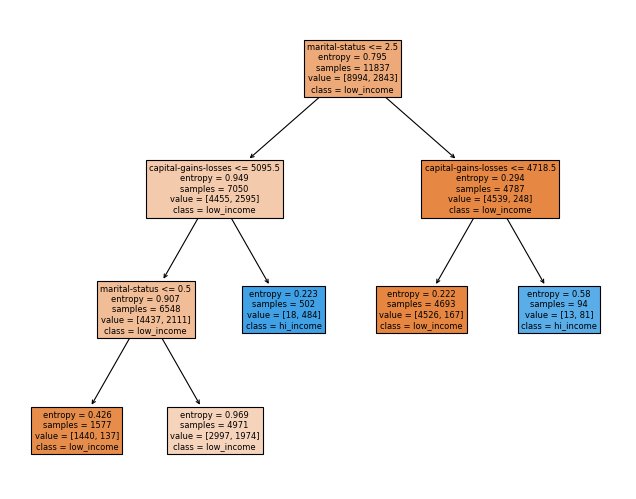

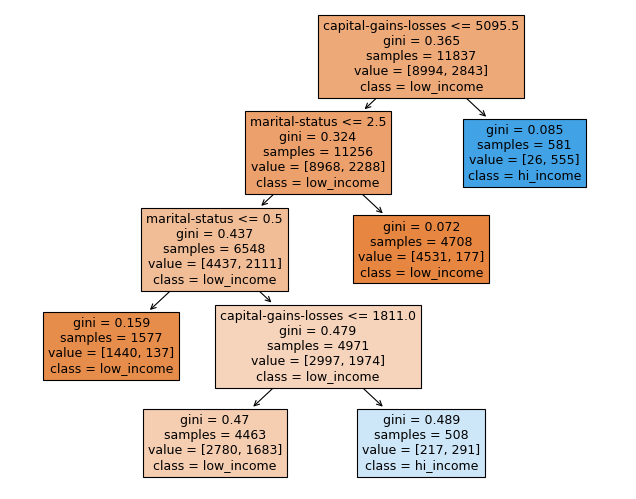

In [111]:
def displayTree(z,x,w):
  z = DecisionTreeClassifier(criterion = w, 
                                         max_leaf_nodes=5,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
  from matplotlib.pyplot import figure
  figure(figsize=(10, 8), dpi=80)


# Plot the tree
  cn = ['low_income', 'hi_income']
  tree.plot_tree(z, feature_names=x.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)


# Print the text version of the tree
  text_representation = tree.export_text(z, 
                                       feature_names=x.columns.values.tolist())
  print(text_representation)

displayTree(c5_classifier, X,"entropy")
displayTree(cart_classifier, X,"gini")

This is the display function. As stated I had to basically call the dataframe function inside of the display tree function. This displays both the text and plot of the trees.

[[2235   14]
 [ 583  128]]
[[2187   62]
 [ 511  200]]


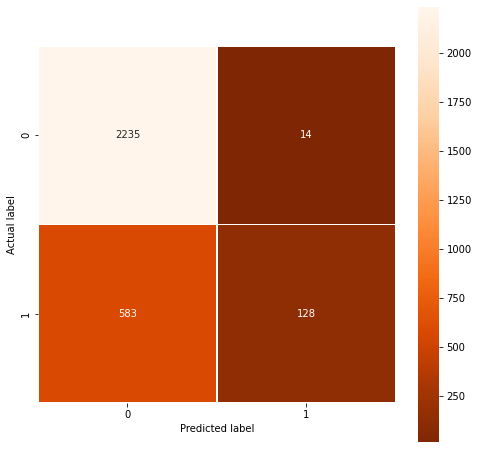

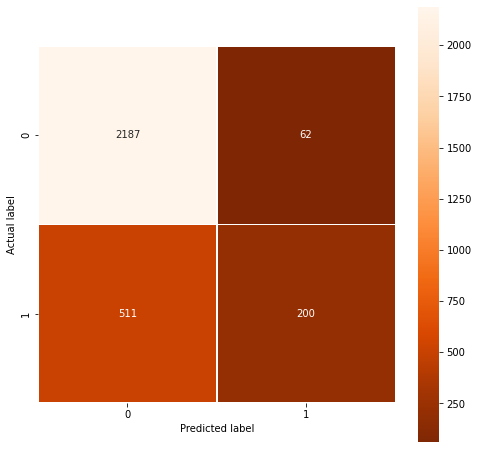

In [112]:
from sklearn.externals._packaging.version import PrePostDevType
from sklearn.metrics import confusion_matrix
import seaborn as sns
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_leaf_nodes=5,
                                         random_state = 120).fit(X_train, y_train)
c5_classifier = DecisionTreeClassifier(criterion = "entropy", 
                                       max_leaf_nodes=5,
                                       random_state = 120).fit(X_train,y_train)
def displayCM(z,xte,yte,xtr,ytr):
  pred = z.predict(xte)
  c5_cm = confusion_matrix(y_true=y_test, 
                        y_pred = pred)

  print(c5_cm)
  plt.figure(figsize=(8,8))
  sns.heatmap(c5_cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')




displayCM(c5_classifier, X_test, y_test,X_train,y_train)
displayCM(cart_classifier,X_test,y_test,X_train,y_train)

These are the confusion matrixes in text and in the heat map which I find most visually appealing.

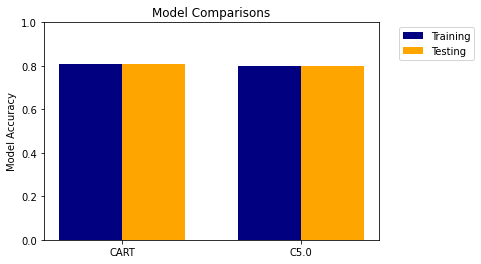

In [113]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



def compareModels(ca, c5):

  # Record CART's classification accuracy on tarining and test datasets
  score1 = round(ca.score(X_train, y_train), 2) # training score
  score2 = round(ca.score(X_test, y_test), 2)   # testing score

# Record C5's classification accuracy on tarining and test datasets
  score3 = round(c5.score(X_train, y_train), 2) # training score
  score4 = round(c5.score(X_test, y_test), 2)   # testing score

  labels = ['CART', 'C5.0']
  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()
compareModels(cart_classifier, c5_classifier)

This is the compare model function.

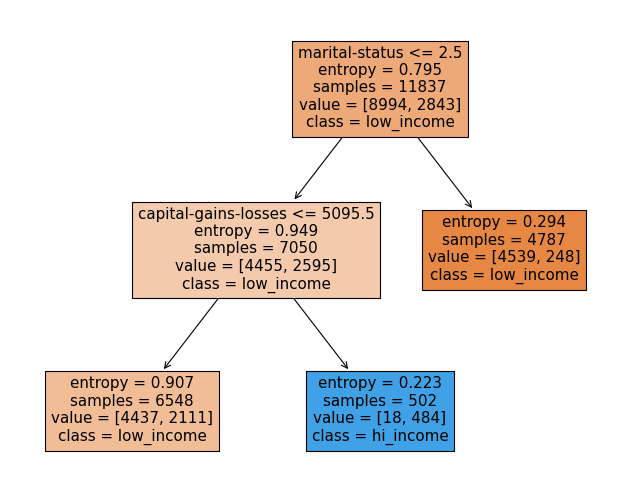

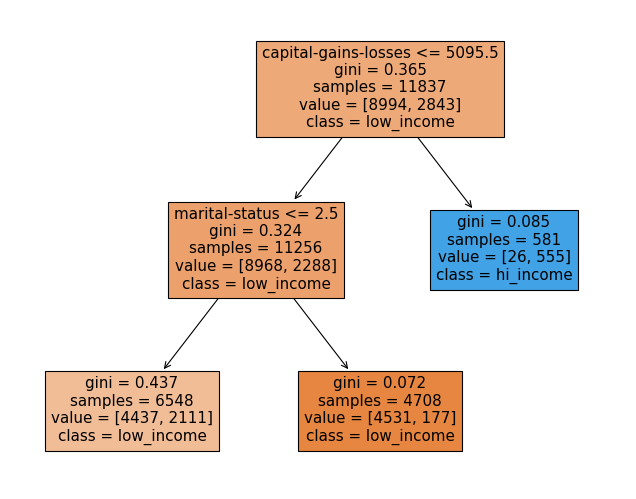

In [119]:
def displayTree(z,x,w):
  z = DecisionTreeClassifier(criterion = w,  
                                         max_leaf_nodes=3,
                                         max_depth=2,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
  from matplotlib.pyplot import figure
  figure(figsize=(10, 8), dpi=80)


# Plot the tree
  cn = ['low_income', 'hi_income']
  tree.plot_tree(z, feature_names=x.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)


# Print the text version of the tree
  text_representation = tree.export_text(z, 
                                       feature_names=x.columns.values.tolist())
  
displayTree(c5_classifier, X,"entropy")
displayTree(cart_classifier, X,"gini")

max_leaf_nodes=3,                                         max_depth=2,

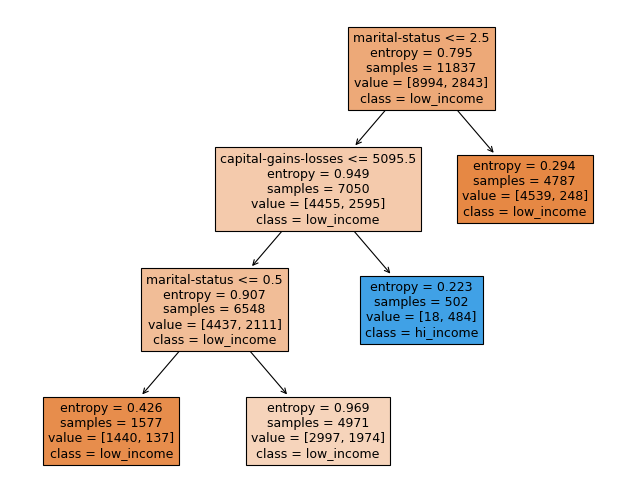

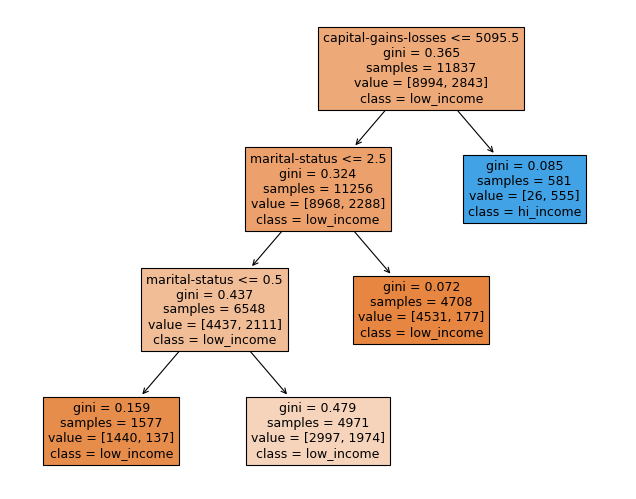

In [118]:
def displayTree(z,x,w):
  z = DecisionTreeClassifier(criterion = w, 
                                         max_leaf_nodes=4,
                                         max_depth=3,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
  from matplotlib.pyplot import figure
  figure(figsize=(10, 8), dpi=80)


# Plot the tree
  cn = ['low_income', 'hi_income']
  tree.plot_tree(z, feature_names=x.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)


# Print the text version of the tree
  text_representation = tree.export_text(z, 
                                       feature_names=x.columns.values.tolist())
  
displayTree(c5_classifier, X,"entropy")
displayTree(cart_classifier, X,"gini")

 max_leaf_nodes=4,                                         max_depth=3,

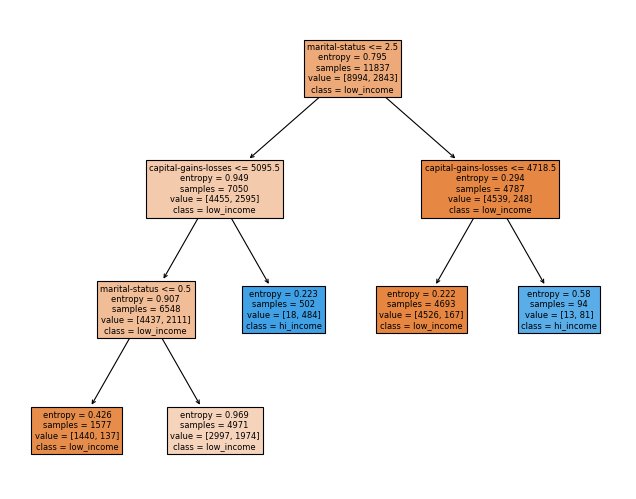

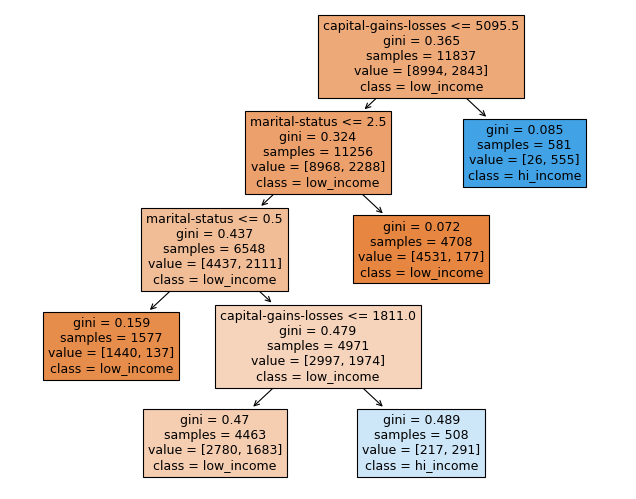

In [117]:
def displayTree(z,x,w):
  z = DecisionTreeClassifier(criterion = w, 
                                         max_leaf_nodes=5,
                                         max_depth=4,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
  from matplotlib.pyplot import figure
  figure(figsize=(10, 8), dpi=80)


# Plot the tree
  cn = ['low_income', 'hi_income']
  tree.plot_tree(z, feature_names=x.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)


# Print the text version of the tree
  text_representation = tree.export_text(z, 
                                       feature_names=x.columns.values.tolist())
  
displayTree(c5_classifier, X,"entropy")
displayTree(cart_classifier, X,"gini")

max_leaf_nodes=5,                                         max_depth=4,

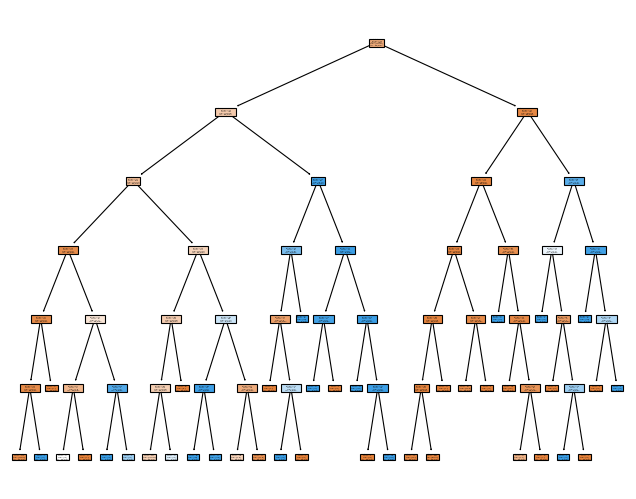

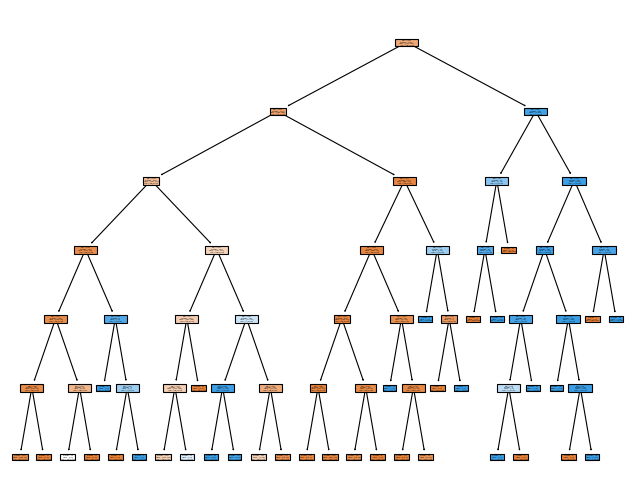

In [116]:
def displayTree(z,x,w):
  z = DecisionTreeClassifier(criterion = w, 
                                         max_depth=6,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
  from matplotlib.pyplot import figure
  figure(figsize=(10, 8), dpi=80)


# Plot the tree
  cn = ['low_income', 'hi_income']
  tree.plot_tree(z, feature_names=x.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)


# Print the text version of the tree
  text_representation = tree.export_text(z, 
                                       feature_names=x.columns.values.tolist())
  
displayTree(c5_classifier, X,"entropy")
displayTree(cart_classifier, X,"gini")

max_leaf_nodes=none,
max_depth=6,

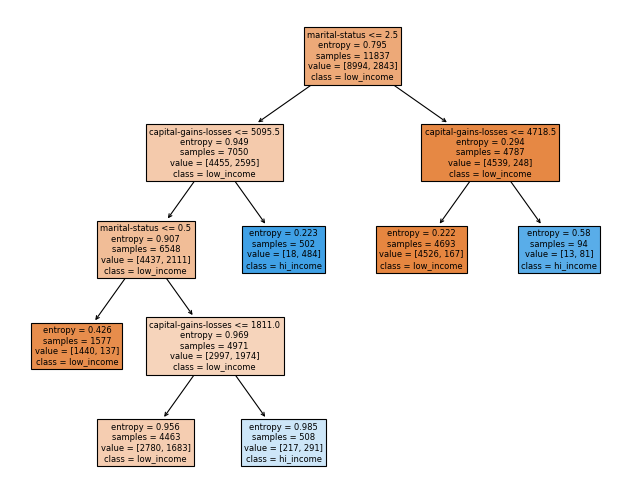

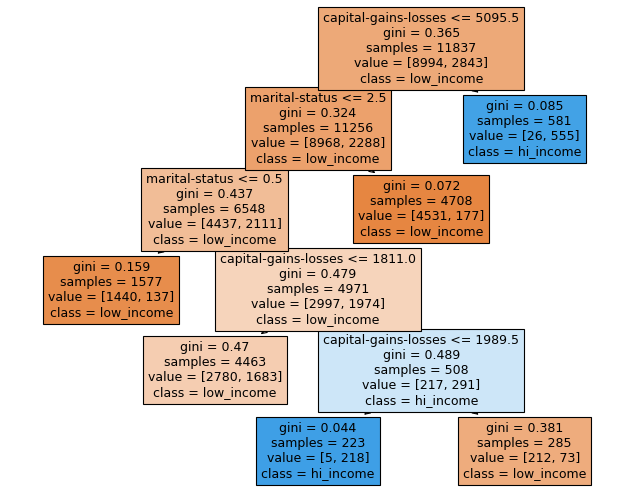

In [115]:
def displayTree(z,x,w):
  z = DecisionTreeClassifier(criterion = w, 
                                         max_leaf_nodes=6,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
  from matplotlib.pyplot import figure
  figure(figsize=(10, 8), dpi=80)


# Plot the tree
  cn = ['low_income', 'hi_income']
  tree.plot_tree(z, feature_names=x.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)


# Print the text version of the tree
  text_representation = tree.export_text(z, 
                                       feature_names=x.columns.values.tolist())
  
displayTree(c5_classifier, X,"entropy")
displayTree(cart_classifier, X,"gini")

max_leaf_nodes=6,
max_depth=none,

Looking at the different leaf node lengths and max depths, the lack of a max leaf node made the tree seemingly irrelovent due to the multitude of nodes. On the contrary, the max depth being none yielded a fairly clean results. Not too little nodes that the tree is not split, but not to exact that there are too many nodes. 